In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"] = 15,5
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')


In [36]:
housingdata = pd.read_csv("USA_Housing.csv")
housingdata.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [37]:
housingdata.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [38]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


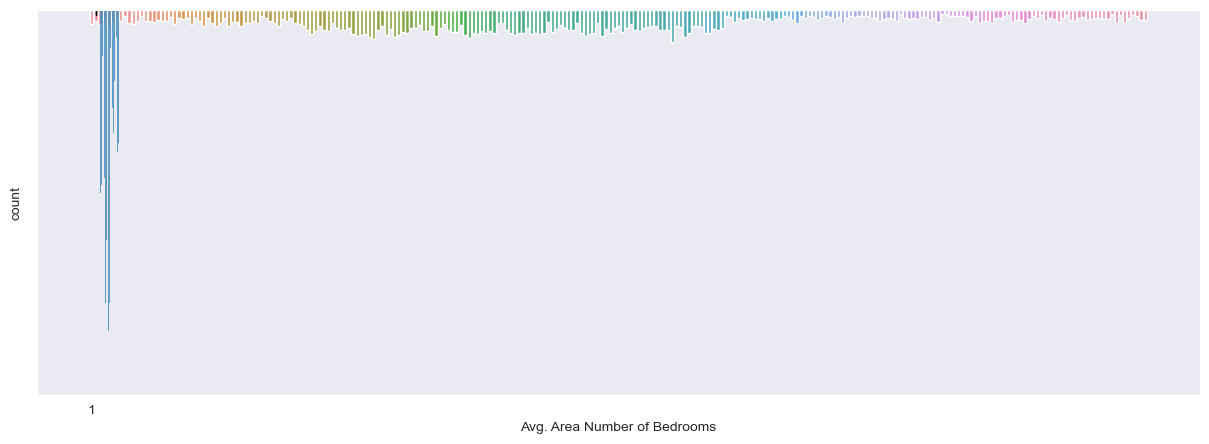

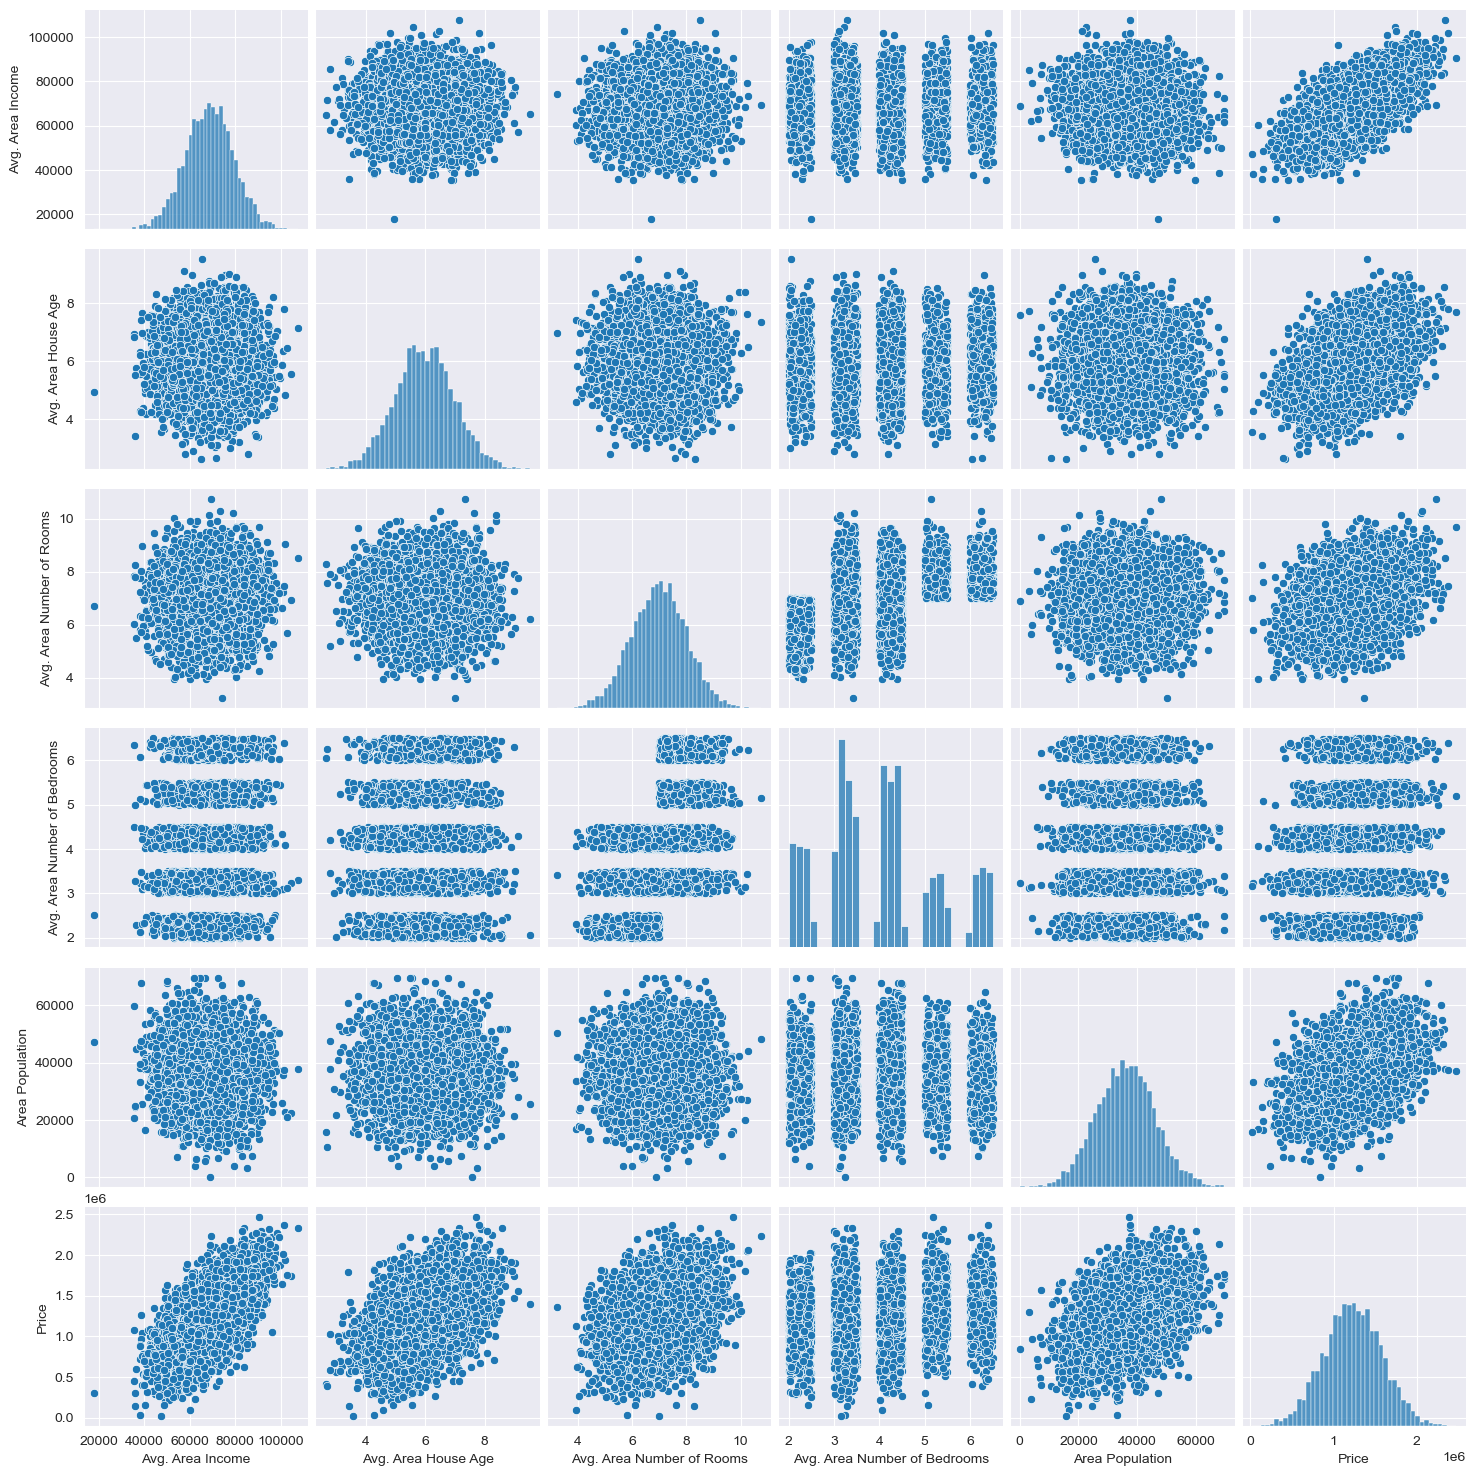

In [39]:
sns.pairplot(housingdata)
plt.show()

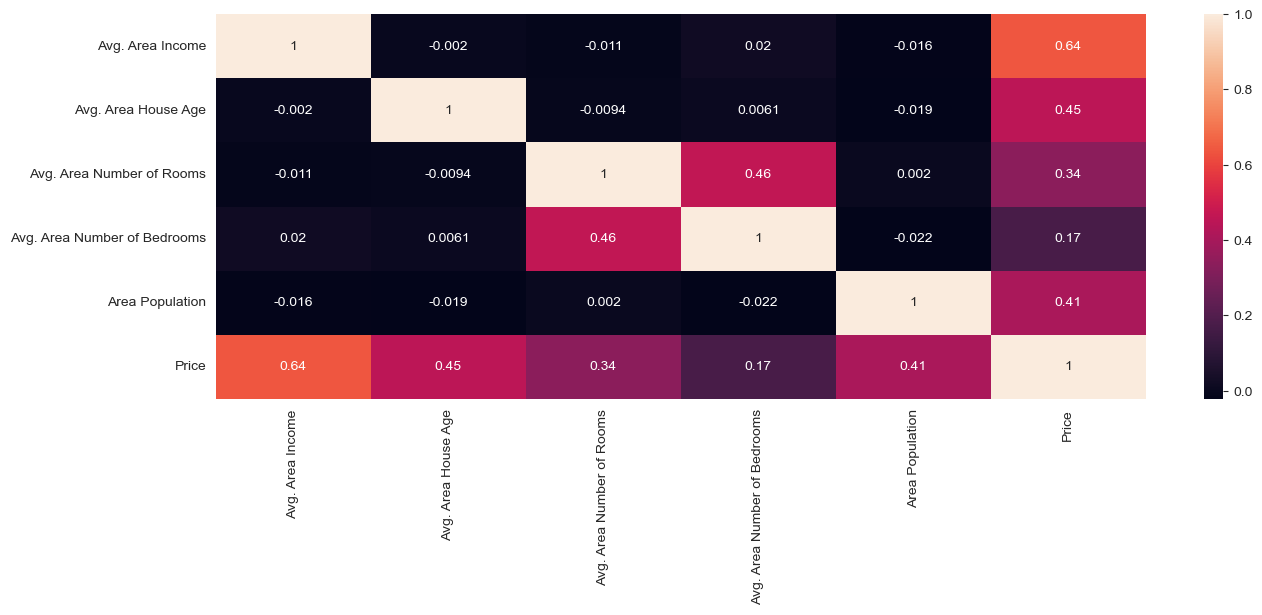

In [40]:
sns.heatmap(housingdata.corr(), annot=True)
plt.show()

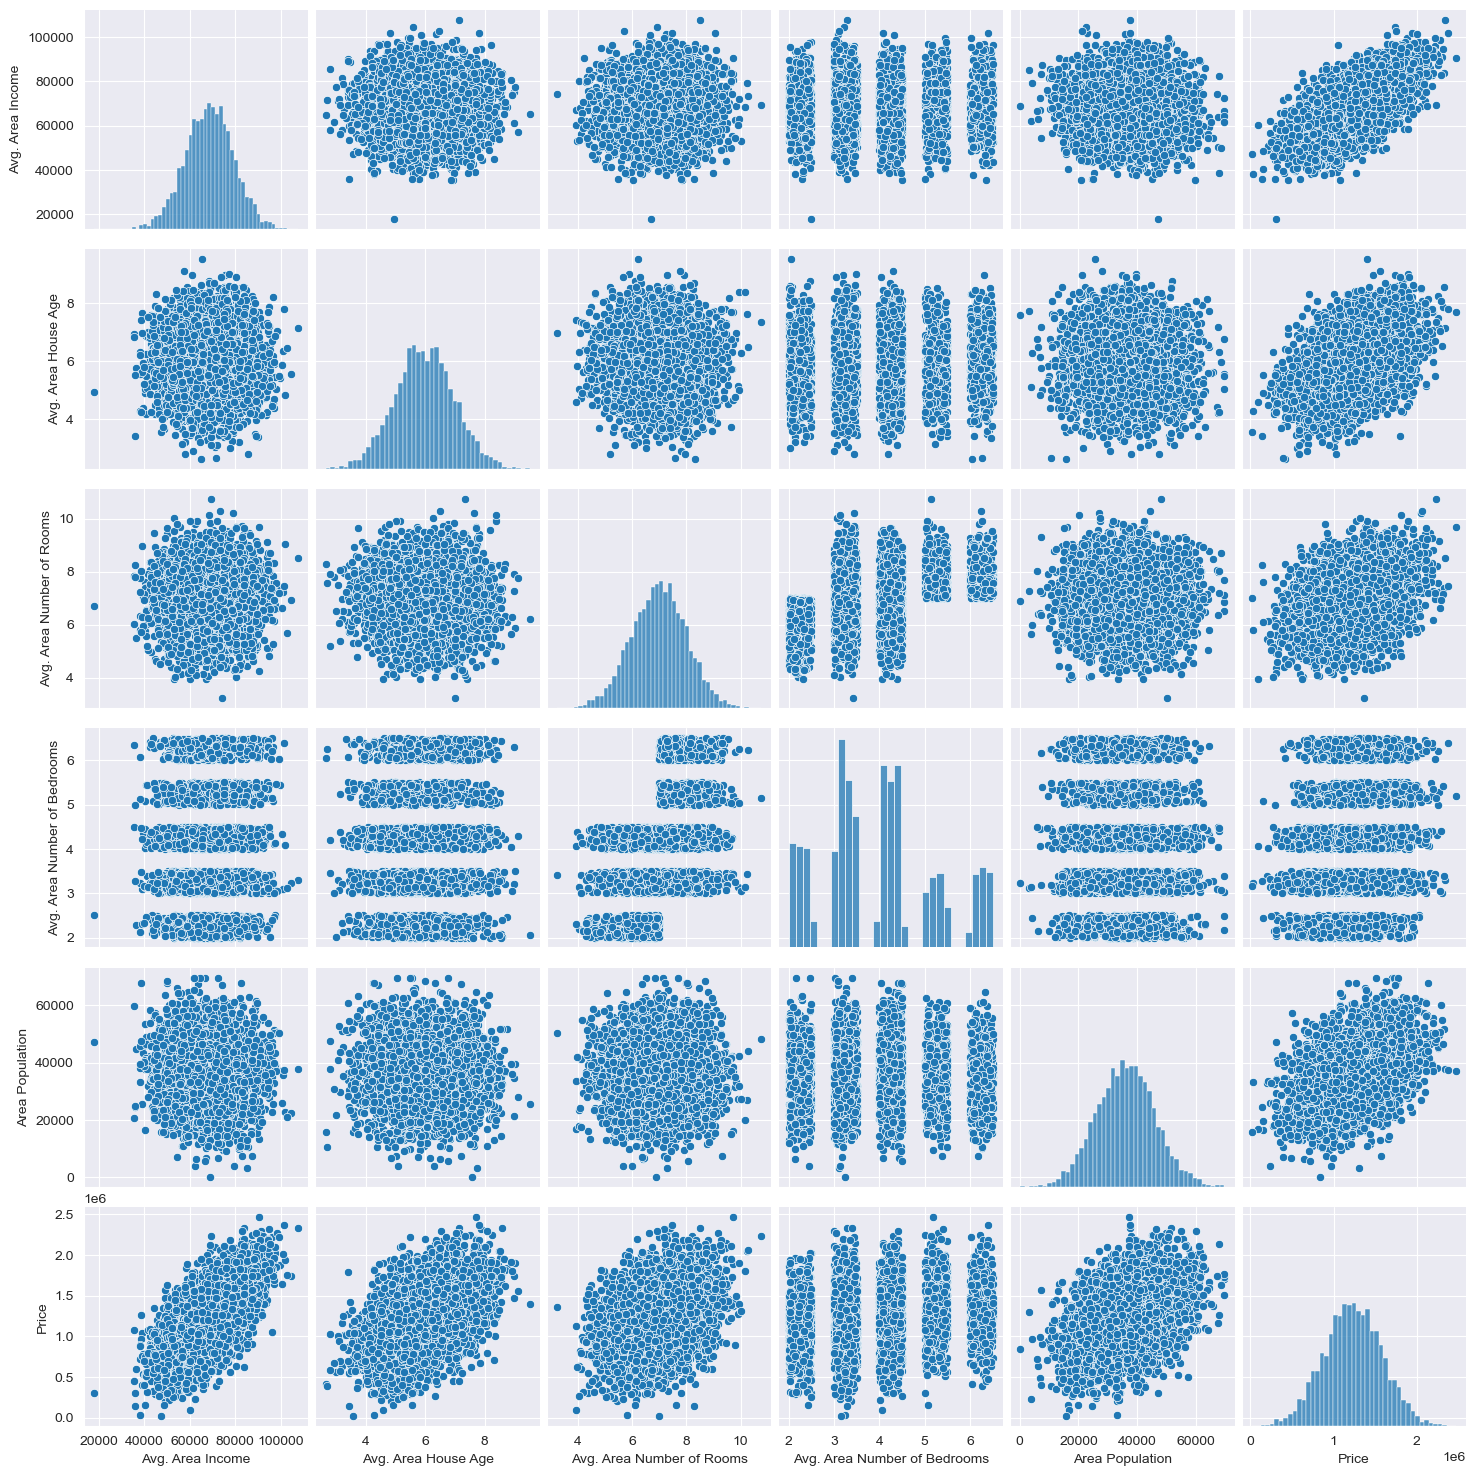

In [41]:
sns.pairplot(housingdata)
plt.show()

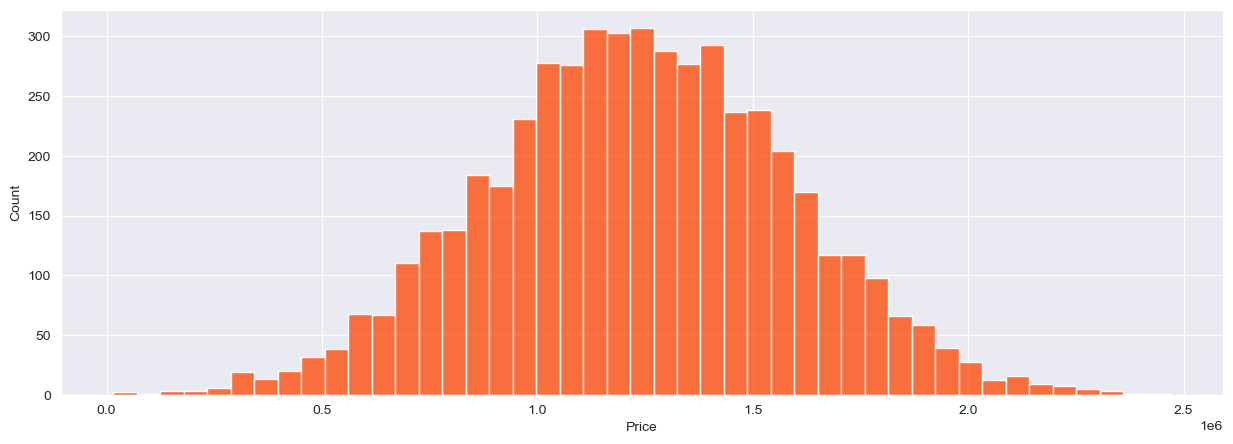

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64


In [42]:
sns.histplot(housingdata["Price"], color = "orangered")
plt.show()
print(housingdata["Price"].describe())

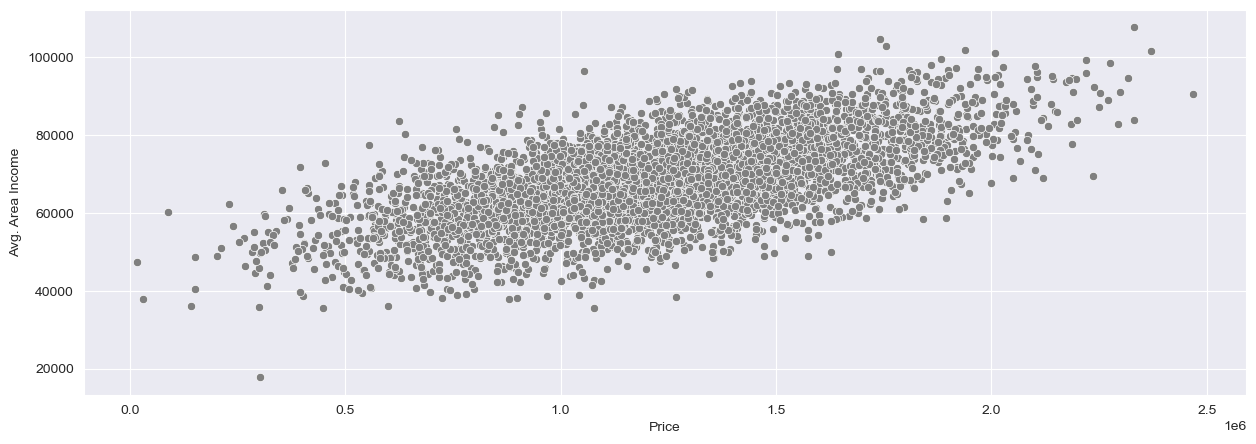

In [76]:
sns.scatterplot(x = "Price", y = "Avg. Area Income", data = housingdata, color = "grey")
plt.show()

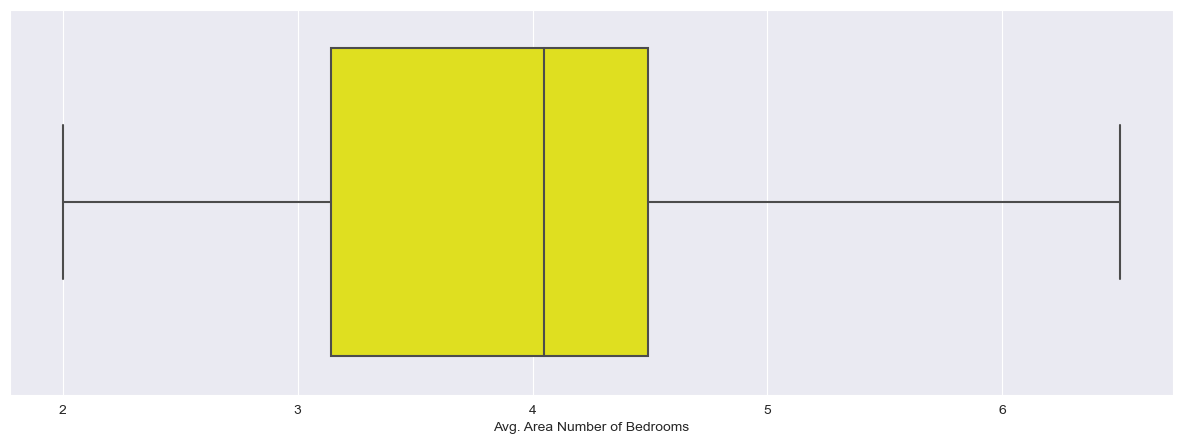

In [44]:
sns.boxplot(x = "Avg. Area Number of Bedrooms", data = housingdata, color = "yellow")
plt.show()

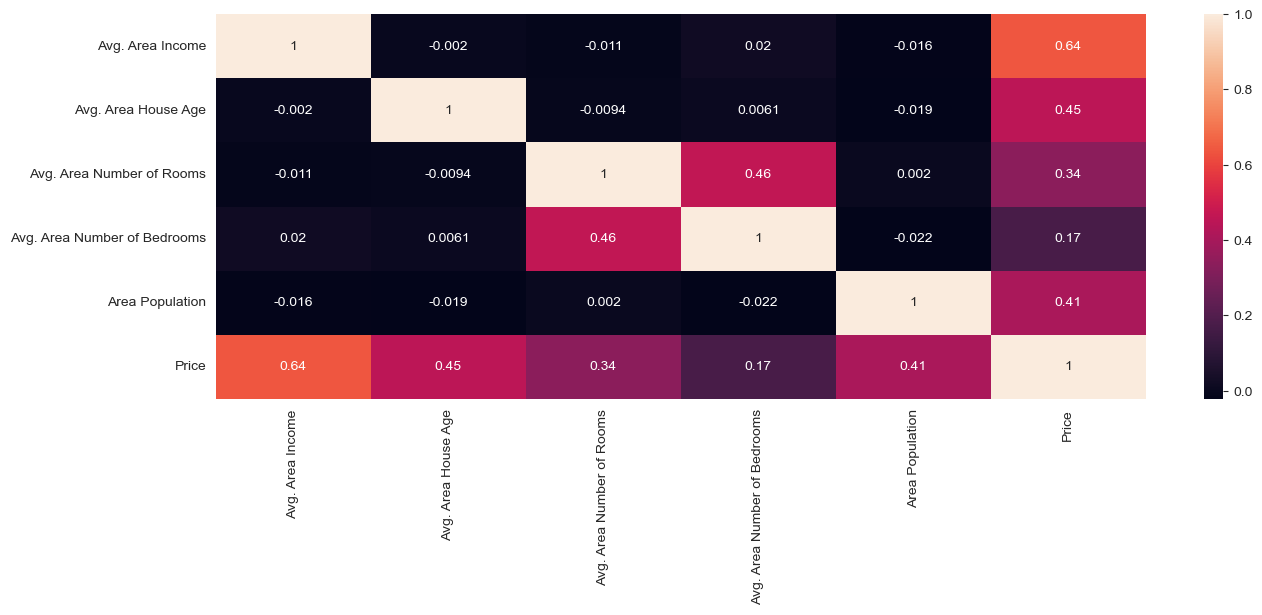

In [45]:
sns.heatmap(housingdata.corr(), annot=True)
plt.show()

In [46]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


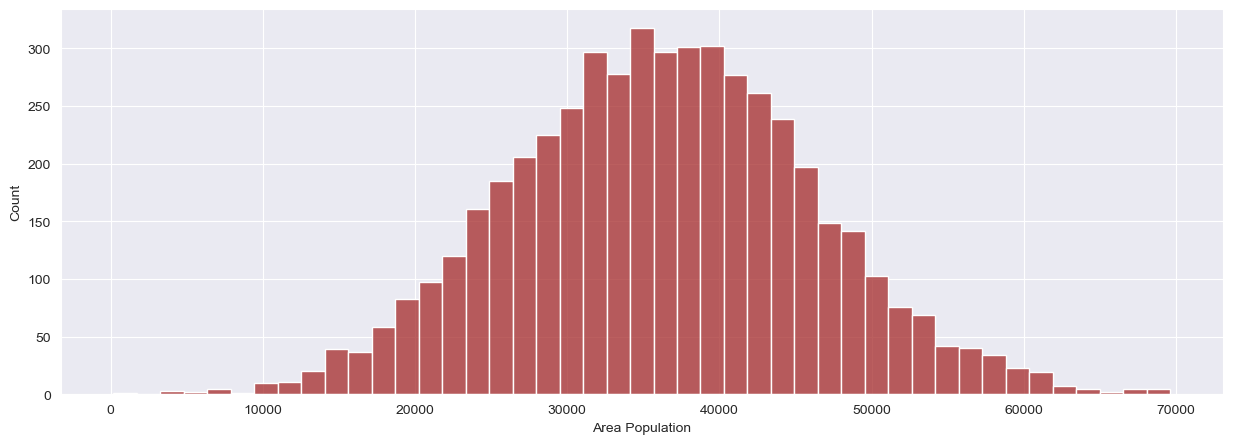

In [74]:
sns.histplot(x = "Area Population", data = housingdata, color = "brown")
plt.show()

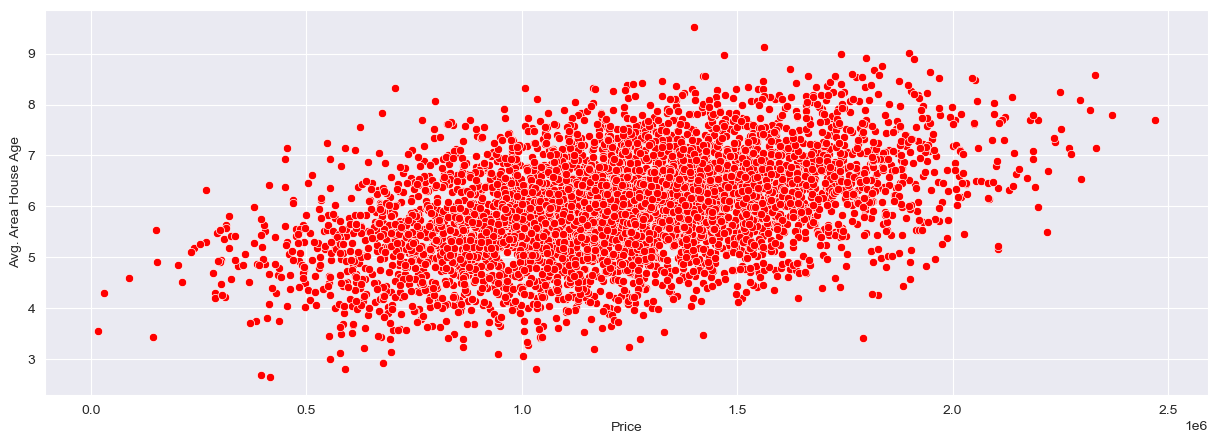

In [73]:
sns.scatterplot(x = "Price", y = ("Avg. Area House Age"),data = housingdata, color = "red")
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
x = housingdata[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms",
                 "Area Population"]]
y = housingdata["Price"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [50]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [51]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("MAE: ", metrics.mean_absolute_error(y_test,predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R2 Score: ", r2_score(y_test, predictions))

MAE:  81906.40261523839
MSE:  10260630250.467915
RMSE:  101294.76911700779
R2 Score:  0.9202977128405782


In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.05, normalize=True)
ridge.fit(x_train,y_train)
predictions_ridge = ridge.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))
print('R2 Score: ', r2_score(y_test, predictions_ridge))

MAE: 82977.64001374172
MSE: 10548870023.171036
RMSE: 102707.69213243492
R2 Score:  0.9180587305778948


In [53]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.05, normalize=True)
lasso.fit(x_train,y_train)
predictions_lasso = lasso.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso)))
print('R2 Score: ', r2_score(y_test, predictions_lasso))

MAE: 81906.33672804176
MSE: 10260631175.284492
RMSE: 101294.77368198466
R2 Score:  0.9202977056568092


In [59]:
#changing test_size for train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y,test_size = 0.2)
#linear regression with train size = 0.8 , test size = 0.2
lm2 = LinearRegression()
lm2.fit(x2_train, y2_train)
predictions2 = lm.predict(x2_test)
print("MAE: ", metrics.mean_absolute_error(y2_test,predictions2))
print("MSE: ", metrics.mean_squared_error(y2_test, predictions2))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y2_test,predictions2)))
print("R2 Score: ", r2_score(y2_test, predictions2))

MAE:  82916.31220086868
MSE:  10340752373.265823
RMSE:  101689.48998429396
R2 Score:  0.912885680125046


In [58]:
#ridge regression
ridge2 = Ridge(alpha = 0.05, normalize=True)
ridge2.fit(x2_train,y2_train)
predictions_ridge = ridge.predict(x2_test)
print('MAE:', metrics.mean_absolute_error(y2_test, predictions_ridge))
print('MSE:', metrics.mean_squared_error(y2_test, predictions_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions_ridge)))
print('R2 Score: ', r2_score(y2_test, predictions_ridge))

MAE: 82516.40980292129
MSE: 10750753059.391853
RMSE: 103685.83827790493
R2 Score:  0.9103041970090981


In [57]:
#lasso regression
lasso2 = Lasso(alpha = 0.05, normalize=True)
lasso2.fit(x2_train,y2_train)
predictions_lasso = lasso.predict(x2_test)
print('MAE:', metrics.mean_absolute_error(y2_test, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y2_test, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions_lasso)))
print('R2 Score: ', r2_score(y2_test, predictions_lasso))

MAE: 81847.16677744775
MSE: 10576101257.896551
RMSE: 102840.17336574532
R2 Score:  0.9117613538698673
